In [1]:
from google.colab import drive
drive.mount('/content/drive')
path ="/content/drive/MyDrive/ml_dataset/data_v2.json"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

df = pd.DataFrame

data_set = pd.read_json(path)

In [3]:
data_set = data_set.drop(['author','published_date', 'modification_date', 'tag', 'comment_count', 'url'] , axis =1)

print(data_set['category'].value_counts())
# data_set['category']

data_set.head(5)

bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
opinion           15699
technology        12116
life-style        10852
education          9721
Name: category, dtype: int64


,category,category_bn,title,content
0,bangladesh,বাংলাদেশ,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...
1,sports,খেলা,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,এবারের উইম্বলডনটা স্মরণীয় করে রাখার মিশনেই যে...
2,bangladesh,বাংলাদেশ,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন ও বিরোধীদলীয় ...
3,technology,বিজ্ঞান ও প্রযুক্তি,পাসওয়ার্ড ভুলে যান!,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...
4,technology,বিজ্ঞান ও প্রযুক্তি,চলে গেলেন মাউস উদ্ভাবক,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...


In [12]:
!pip install bltk


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached bltk-1.2.tar.gz (17.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached sklearn-0.0.post1.tar.gz (3.6 kB)
  Preparing metadata (setup.py) ... done
  Created wheel for bltk: filename=bltk-1.2-py3-none-any.whl size=17432537 sha256=4d498eb5b27d442240abd8879ac1230125eecf1c52df7cc34a76f6ca8f1ba0cf
  Stored in directory: /root/.cache/pip/wheels/40/95/27/80bfbeb60364f00de71ea3570cb9b76ab17c8e8ab944c2d81b
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2955 sha256=d424db08eafe36078217d039be998a562434344b527d9f60cbfc6c36ab0674c7
  Stored in directory: /root/.cache/pip/wheels/f8/e0/3d/9d0c2020c44a519b9f02ab4fa6d2a4a996c98d79ab2f569fa1
Successfully built bltk sklearn


In [13]:
from bltk.langtools import Tokenizer
from bltk.langtools import remove_stopwords

x = data_set.loc[:,("content")]
tokenizer = Tokenizer()
new_content = []
for i in range(0,len(x)):
  clean_sen =[]
  token_word = tokenizer.word_tokenizer(x[i])
  clean_sen = remove_stopwords(token_word, level='moderate')
  sentence = ' '.join(clean_sen)
  new_content.append(sentence)

In [14]:
print(len(new_content))
print(len(x))
y = data_set.loc[:,("category")]
z = data_set.loc[:,("title")]
modf ={
    'title' : z,
    'content' : new_content,
    'category' : y
}
final_df = pd.DataFrame(modf)
final_df.head(5)

408471
408471


,title,content,category
0,"কালিয়াকৈরে টিফিন খেয়ে ৫০০ শ্রমিক অসুস্থ, বিক...",গাজীপুরের কালিয়াকৈর উপজেলার তেলিরচালা এলাকায়...,bangladesh
1,সেমিফাইনাল বাধাও পেরিয়ে গেলেন লিসিকি,এবারের উইম্বলডনটা স্মরণীয় রাখার মিশনেই নেমেছে...,sports
2,সংসদে খালেদার অভিযোগের জবাব দিয়েছে ভারত,জাতীয় সংসদে বিএনপি চেয়ারপারসন বিরোধীদলীয় নে...,bangladesh
3,পাসওয়ার্ড ভুলে যান!,সহজ পাসওয়ার্ডের কারণে অনলাইন অ্যাকাউন্ট সহজেই...,technology
4,চলে গেলেন মাউস উদ্ভাবক,কম্পিউটার মাউসের উদ্ভাবক ডগলাস অ্যাঙ্গেলবার্ট ...,technology


In [15]:
# final_df.to_csv("clean_dataset.csv")

In [16]:
ass = tokenizer.word_tokenizer(data_set.loc[0, ("content")])
print(len(ass))
bss = tokenizer.word_tokenizer(final_df.loc[0, ("content")])
print(len(bss))

print(final_df['category'].value_counts())

284
188
bangladesh       232504
sports            49012
international     30856
entertainment     30466
economy           17245
opinion           15699
technology        12116
life-style        10852
education          9721
Name: category, dtype: int64


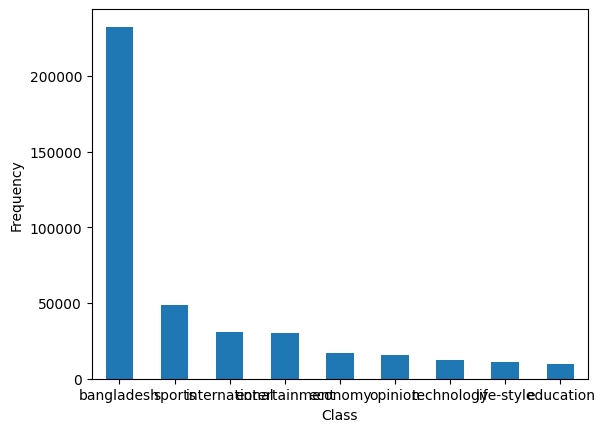

In [17]:
from matplotlib import pyplot as plt

count_classes = final_df.category.value_counts()
count_classes.plot(kind = 'bar', rot=0)
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.show()